É piú concentrato sui dati specificando bene dove vengono messi i dati. TF si concentra di piú sulle operazioni e vengono gestiti in automatico i device

In [1]:
import torch
torch.__version__

'2.0.0+cu117'

In [2]:
torch.cuda.is_available()

True

In [3]:
!nvidia-smi

Mon Apr 17 10:50:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.37       Driver Version: 527.37       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P3    13W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
data = [[1,2,3], [3,5,6]]
pt_data = torch.tensor(data)
pt_data.device

device(type='cpu')

Sposto la variabile sulla memoria della GPU assegandola alla ____ numero 0. Devo mettere tutte le variabili sullo stesso device per poter fare calcoli

In [5]:
# pt_data = pt_data.to(torch.device('cuda:0'))
# pt_data.device

Per quando voglio salvare i risultati delle operazioni (es. un immagine) sul disco devo passare da tipo pytorch a tipo numpy, passando prima peró da GPU a CPU

In [6]:
import numpy
np_data = pt_data.cpu().numpy()

## Read Datasets

In [7]:
path = '../data/eeg_PerceiveLab/'

eeg_data = torch.load(path + 'eeg_5_95_std.pth')
# eeg_data = torch.load(path + eeg_55_95_std.pth')
# eeg_data = torch.load(path + 'eeg_signals_raw_with_mean_std.pth')

split_all = torch.load(path + 'block_splits_by_image_all.pth')
split_single = torch.load(path + 'block_splits_by_image_single.pth')

### Explore structure

In [9]:
eeg_data.keys()

dict_keys(['dataset', 'labels', 'images'])

In [8]:
eeg_data['dataset'][1]

{'eeg': tensor([[-0.0120,  0.0473,  0.1264,  ...,  0.0109,  0.0188,  0.0211],
         [-0.0061,  0.0061,  0.0379,  ...,  0.0466,  0.0355,  0.0135],
         [ 0.0016,  0.0690,  0.1212,  ...,  0.0077, -0.0025,  0.0047],
         ...,
         [ 0.0189,  0.0461,  0.0376,  ..., -0.0657, -0.0639, -0.0245],
         [-0.0043,  0.0026,  0.0072,  ..., -0.0171, -0.0132, -0.0064],
         [ 0.0073,  0.1099,  0.1803,  ..., -0.1500, -0.1019, -0.0184]]),
 'image': 1,
 'label': 30,
 'subject': 4}

In [10]:
images = eeg_data['images']
print('numero di images: ', len(images))
print(*images[:5], sep='\n')

numero di images:  1996
n02951358_31190
n03452741_16744
n04069434_10318
n02951358_34807
n03452741_5499


In [11]:
# with open("files_list.txt", "w") as f:
#     for image in images:
#         f.write(str(image) +"\n")

In [12]:
# labels = o['labels']
labels = [image.split('_')[0] for image in images] # preserve order
print('numero di labels unici: ', len(set(labels)))
print(*labels[:5], sep='\n')

numero di labels unici:  40
n02951358
n03452741
n04069434
n02951358
n03452741


In [13]:
n_subjects = 6
print('numero di subjects: ', n_subjects)

numero di subjects:  6


In [14]:
print('numero di EEG: ', len(eeg_data['dataset']))
print(f'{len(images)} images * {n_subjects} subjects = {len(images)*n_subjects}')

numero di EEG:  11965
1996 images * 6 subjects = 11976


### Request images kaggle

In [15]:
# !kaggle competitions download -c imagenet-object-localization-challenge -f LOC_train_solution.csv

In [16]:
# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi()
# api.authenticate()

In [17]:
# from tqdm import tqdm
# import time

# wait = 600

# for _, (file, folder) in tqdm(enumerate(zip(files[500:], folders[500:])), total = len(files)):
#     while True:
#         try:
#             api.competition_download_file('imagenet-object-localization-challenge',
#                                 file_name = f'ILSVRC/Data/CLS-LOC/train/{folder}/{file}.JPEG',
#                                 path = f'./ImageNet_images/{folder}',
#                                 quiet = True)
#         except:
#             print(f'wait {wait} sec')
#             time.sleep(wait)
#             print(f'stop waiting')

### Exploration EEG signals

In [18]:
eeg_data['dataset'][0]

{'eeg': tensor([[-0.0098,  0.0195,  0.0620,  ...,  0.0638,  0.0120, -0.0118],
         [-0.0045,  0.1303,  0.2673,  ...,  0.0894,  0.0342, -0.0082],
         [ 0.0215, -0.2017, -0.4305,  ..., -0.2022, -0.0940,  0.0188],
         ...,
         [ 0.0160,  0.0707,  0.1005,  ...,  0.2066,  0.1156,  0.0036],
         [-0.0046, -0.0084, -0.0119,  ...,  0.0007, -0.0026, -0.0053],
         [ 0.0040,  0.0419,  0.0665,  ...,  0.0765,  0.0309, -0.0063]]),
 'image': 0,
 'label': 10,
 'subject': 4}

In [19]:
eeg_data['dataset'][0]['eeg'].shape

torch.Size([128, 500])

In [20]:
print(eeg_data['dataset'][0]['eeg'].min())
print(eeg_data['dataset'][0]['eeg'].max())

tensor(-6.2825)
tensor(2.9073)


- canali piu importanti?
- dimensioni immagini da ricostruire?
- usare dataset con anche info sugli occhi(?)

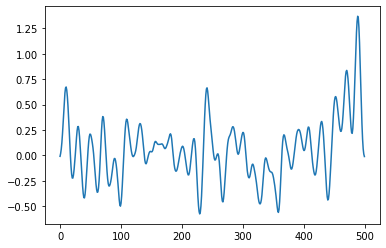

In [21]:
from matplotlib import pyplot as plt

example_55_95 = eeg_data['dataset'][0]['eeg'][0,:].numpy()
plt.plot(example_55_95)

C:\Users\gianl\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


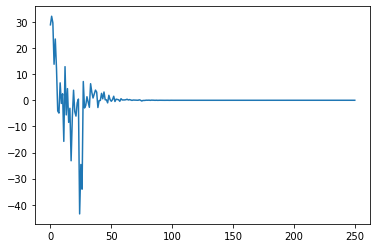

In [22]:
# from scipy.fft import rfft, rfftfreq
import numpy as np
plt.plot(np.fft.rfft(example_55_95))

In [23]:
freq = np.fft.rfftfreq(500, d=1./1000)

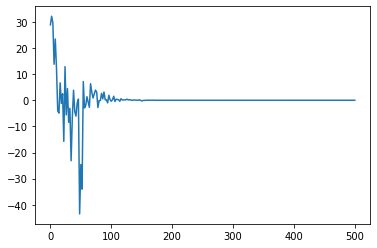

In [24]:
plt.plot(freq, np.fft.rfft(example_55_95))

In [25]:
# from scipy.fft import fft, fftfreq, rfft, rfftfreq
# from scipy.signal import spectrogram
# from librosa.feature import melspectrogram, mfcc
# from librosa.display import specshow

### Other datasets exploration

In [26]:
print(split_all.keys())
print(len(split_all['splits']))
print(split_all['splits'][0].keys()) # 6 possibilita diverse di split (usare lo 0!)
print(len(split_all['splits'][0]['train']) + len(split_all['splits'][0]['val']) + len(split_all['splits'][0]['test']))

dict_keys(['splits'])
6
dict_keys(['train', 'val', 'test'])
11965


In [27]:
print(split_single.keys())
print(len(split_single['splits']))
print(split_single['splits'][0].keys()) # c'é un unico split proposto
print(len(split_single['splits'][0]['train']) + len(split_single['splits'][0]['val']) + len(split_single['splits'][0]['test']))

dict_keys(['splits'])
1
dict_keys(['train', 'val', 'test'])
1000


### Train, test, val split

In [28]:
print(len(eeg_data['dataset']))
print(len(split_all['splits'][0]['train']) + len(split_all['splits'][0]['val']) + len(split_all['splits'][0]['test']))

11965
11965


In [29]:
# eeg_data_train = {'dataset': [eeg_data['dataset'][i] for i in split_all['splits'][0]['train']],
#                   'labels': set([eeg_data['dataset'][i]['label'] for i in split_all['splits'][0]['train']]),
#                   'images': set([eeg_data['dataset'][i]['image'] for i in split_all['splits'][0]['train']])}
# eeg_data_val = {'dataset': [eeg_data['dataset'][i] for i in split_all['splits'][0]['val']]}
# eeg_data_test = {'dataset': [eeg_data['dataset'][i] for i in split_all['splits'][0]['test']]}

In [30]:
eeg_data['dataset'][0]

{'eeg': tensor([[-0.0098,  0.0195,  0.0620,  ...,  0.0638,  0.0120, -0.0118],
         [-0.0045,  0.1303,  0.2673,  ...,  0.0894,  0.0342, -0.0082],
         [ 0.0215, -0.2017, -0.4305,  ..., -0.2022, -0.0940,  0.0188],
         ...,
         [ 0.0160,  0.0707,  0.1005,  ...,  0.2066,  0.1156,  0.0036],
         [-0.0046, -0.0084, -0.0119,  ...,  0.0007, -0.0026, -0.0053],
         [ 0.0040,  0.0419,  0.0665,  ...,  0.0765,  0.0309, -0.0063]]),
 'image': 0,
 'label': 10,
 'subject': 4}

### Filter ImageNet attributes

Read files

In [33]:
with open("C:\\Users\\gianl\\Desktop\\ImageNet attributes\\LOC_synset_mapping.txt", "r") as f:
    LOC_synset_mapping = f.readlines()

In [34]:
import pandas as pd
LOC_train_solution = pd.read_csv("C:\\Users\\gianl\\Desktop\\ImageNet attributes\\LOC_train_solution.csv", sep=',')

Filter lines

In [35]:
LOC_synset_mapping_used = [line for line in LOC_synset_mapping if line[:9] in eeg_data['labels']]
LOC_synset_mapping_used[:5]

['n02106662 German shepherd, German shepherd dog, German police dog, alsatian\n',
 'n02124075 Egyptian cat\n',
 'n02281787 lycaenid, lycaenid butterfly\n',
 'n02389026 sorrel\n',
 'n02492035 capuchin, ringtail, Cebus capucinus\n']

In [36]:
LOC_train_solution.head()

,ImageId,PredictionString
0,n02017213_7894,n02017213 115 49 448 294
1,n02017213_7261,n02017213 91 42 330 432
2,n02017213_5636,n02017213 230 104 414 224
3,n02017213_6132,n02017213 46 82 464 387
4,n02017213_7659,n02017213 103 66 331 335


In [37]:
LOC_train_solution_used = LOC_train_solution[LOC_train_solution['ImageId'].isin(eeg_data['images'])]
LOC_train_solution_used

,ImageId,PredictionString
29636,n03775071_4799,n03775071 38 67 431 315
29644,n03775071_19072,n03775071 171 13 421 205 n03775071 80 129 323 ...
29668,n03775071_3112,n03775071 0 107 104 243 n03775071 104 54 223 206
29683,n03775071_950,n03775071 29 78 176 316
29694,n03775071_9762,n03775071 79 38 393 311
...,...,...
538517,n04069434_1429,n04069434 96 105 350 418
538519,n04069434_8666,n04069434 10 28 409 493
538587,n04069434_17289,n04069434 0 26 401 373
538594,n04069434_9580,n04069434 54 39 423 333


Save files

In [38]:
# with open("C:\\Users\\gianl\\Desktop\\ImageNet attributes\\LOC_synset_mapping_used.txt", "w") as f:
#     f.write(''.join(LOC_synset_mapping_used))

## Channel correlation

In [45]:
eeg_data_train['eeg'][0].shape

torch.Size([128, 500])

- 1 - 32 channels green ports
- 33 - 64 channels yellow ports
- 65 - 96 channels red ports
- 97 - 128 channels white ports

In [ ]:
# # Previously used 128ch Standard Layouts for actiCAP
# green = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']
# yellow = ['AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FT9', 'FT7', 'FC3', 'FC4', 'FT8', 'FT10', 'C5', 'C1', 'C2', 'C6', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']
# red = ['Fpz', 'F9', 'AFF5h', 'AFF1h', 'AFF2h', 'AFF6h', 'F10', 'FTT9h', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'FCC2h', 'FCC4h', 'FCC6h', 'FTT8h', 'FTT10h', 'TPP9h', 'TPP7h', 'CPP5h', 'CPP3h', 'CPP1h', 'CPP2h', 'CPP4h', 'CPP6h', 'TPP8h', 'TPP10h', 'POO9h', 'POO1', 'POO2', 'POO10h', 'Iz']
# white = ['AFp1', 'AFp2', 'FFT9h', 'FFT7h', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h', 'FFC4h', 'FFC6h', 'FFT8h', 'FFT10h', 'TTP7h', 'CCP5h', 'CCP3h', 'CCP1h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'P9', 'PPO9h', 'PPOh5', 'PPO1h', 'PPO2h', 'PPO6h', 'PPO10h', 'P10', 'I1', 'OI1h', 'OI2h', 'I2']



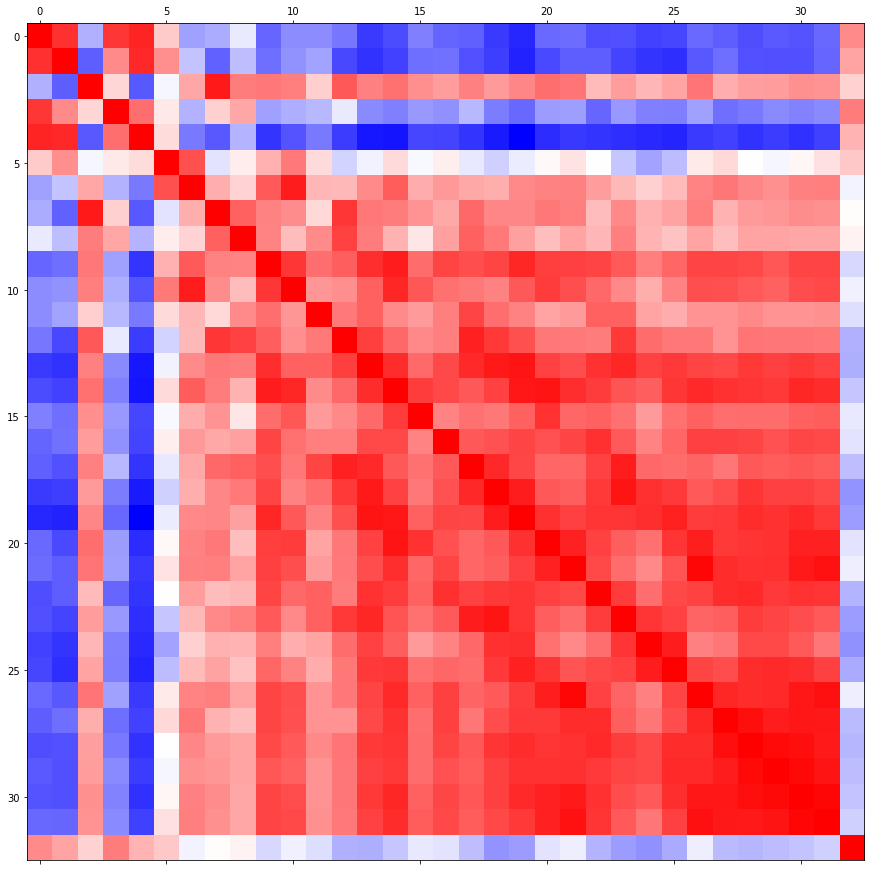

In [62]:
plt.figure(figsize=(19, 15))
fig = plt.matshow(torch.corrcoef(eeg_data_train['eeg'][0][:33]), fignum=1, cmap='bwr')

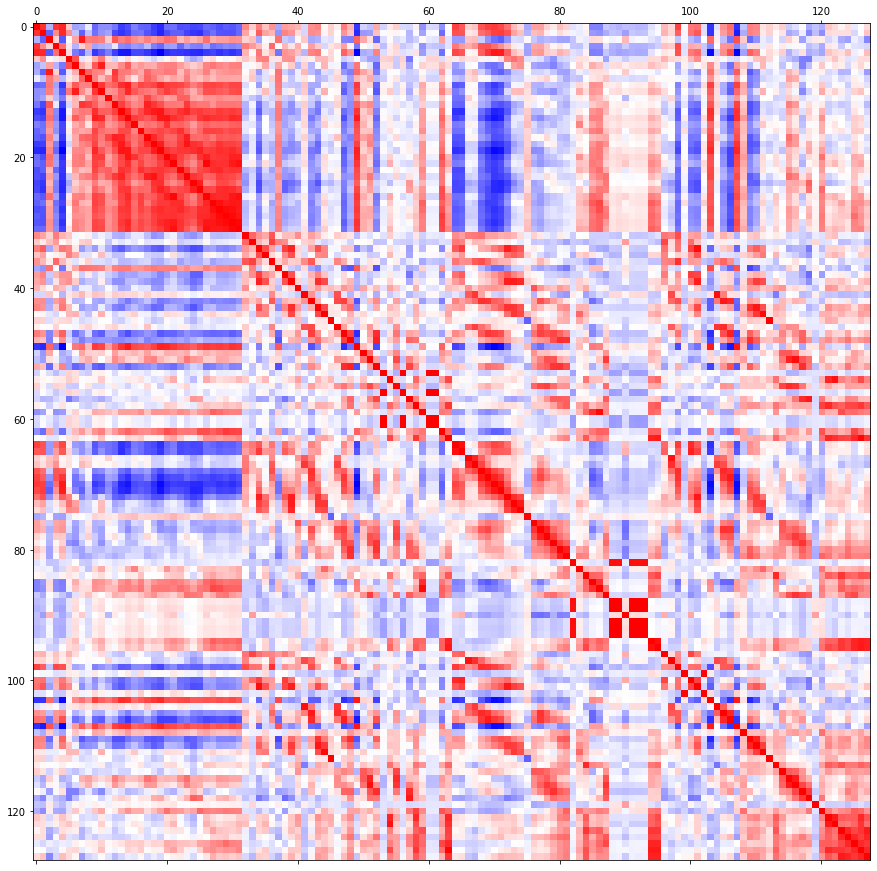

In [59]:
plt.figure(figsize=(19, 15))
fig = plt.matshow(torch.corrcoef(eeg_data_train['eeg'][0]), fignum=1, cmap='bwr')

## Create MNE object

In [65]:
import mne

In [84]:
eeg_data_train['eeg'][0].max()

tensor(2.9073)

Creating RawArray with float64 data, n_channels=128, n_times=497
    Range : 0 ... 496 =      0.000 ...     0.496 secs
Ready.


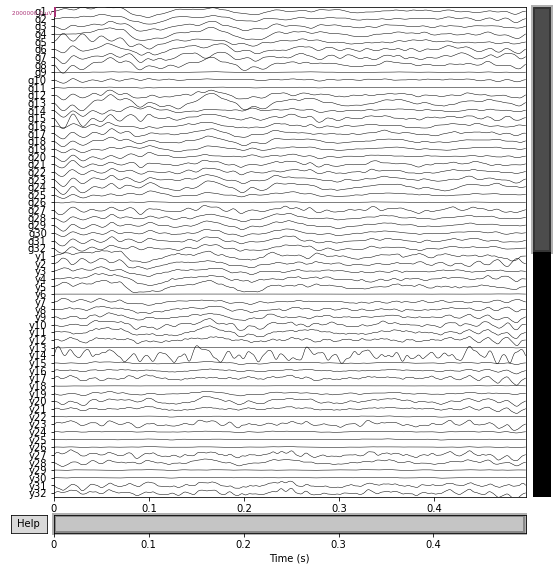

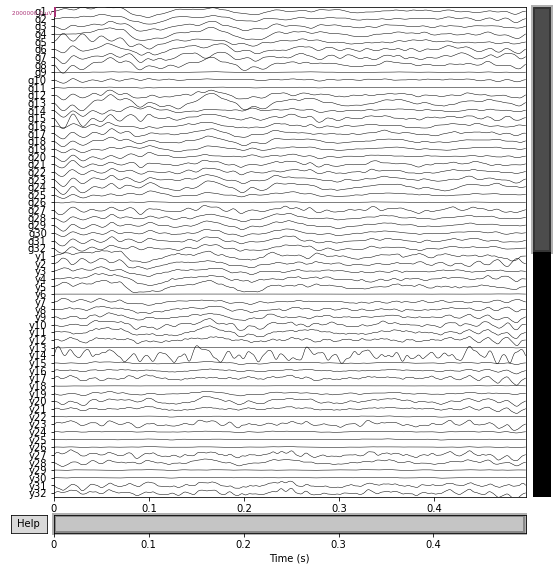

In [115]:
sfreq = 1000
times = np.arange(0, 0.5, 1/sfreq)

l = [[f'{i+str(n)}' for n in range (1, 33)] for i in ['g', 'y', 'r', 'w']]
ch_names = list(np.concatenate(l))
ch_types = ['eeg'] * 128

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
data = eeg_data_train['eeg'][5]
raw = mne.io.RawArray(data, info)

scalings = {'eeg': 1}
raw.plot(title='Data from arrays', show=True, block=True, scalings=scalings, n_channels = 64)

In [92]:
easycap_montage = mne.channels.make_standard_montage('brainproducts-RNP-BA-128')
print(easycap_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 130 channels>


In [102]:
easycap_montage.ch_names

['Fp1',
 'Fz',
 'F3',
 'F7',
 'F9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'P9',
 'O1',
 'Oz',
 'O2',
 'P10',
 'P8',
 'P4',
 'CP2',
 'CP6',
 'T8',
 'C4',
 'Cz',
 'FC2',
 'FC6',
 'F10',
 'F8',
 'F4',
 'Fp2',
 'AF7',
 'AF3',
 'AFz',
 'F1',
 'F5',
 'FT7',
 'FC3',
 'C1',
 'C5',
 'TP7',
 'CP3',
 'P1',
 'P5',
 'PO7',
 'PO3',
 'Iz',
 'POz',
 'PO4',
 'PO8',
 'P6',
 'P2',
 'CPz',
 'CP4',
 'TP8',
 'C6',
 'C2',
 'FC4',
 'FT8',
 'F6',
 'F2',
 'AF4',
 'AF8',
 'AFF3h',
 'FFC1h',
 'FFC5h',
 'FT9',
 'FTT7h',
 'FCC3h',
 'CCP1h',
 'CCP5h',
 'TP9',
 'TPP7h',
 'CPP3h',
 'PPO3h',
 'PPO9h',
 'POO1',
 'PO9',
 'I1',
 'I2',
 'PO10',
 'POO2',
 'PPO10h',
 'PPO4h',
 'CPP4h',
 'TPP8h',
 'TP10',
 'CCP6h',
 'CCP2h',
 'FCC4h',
 'FTT8h',
 'FT10',
 'FFC6h',
 'FFC2h',
 'AFF4h',
 'AFp1',
 'AFF1h',
 'AFF5h',
 'FFT7h',
 'FFC3h',
 'FCC1h',
 'FCC5h',
 'TTP7h',
 'CCP3h',
 'CPP1h',
 'CPP5h',
 'TPP9h',
 'PPO5h',
 'PPO1h',
 'POO9h',
 'OI1h',
 'OI2h',
 'POO10h',
 'PPO2h',
 'PPO6h',
 'TPP10h',
 'CPP6h'

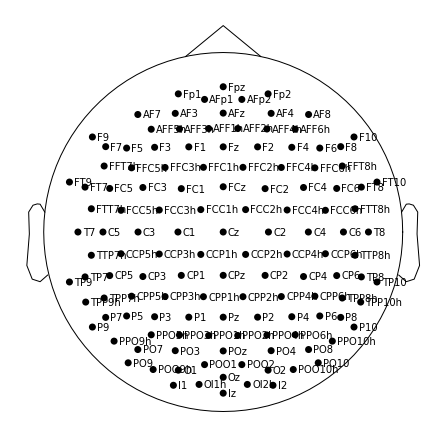

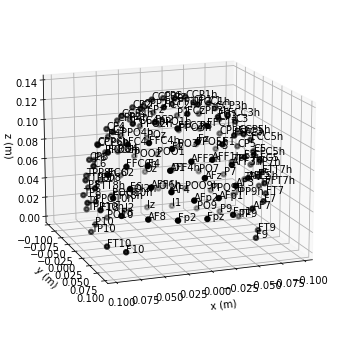

In [93]:
easycap_montage.plot()  # 2D
fig = easycap_montage.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

## Classification

In [ ]:
eeg_data_train = {'eeg': [eeg_data['dataset'][i]['eeg'] for i in split_all['splits'][0]['train']],
                  'labels': [eeg_data['dataset'][i]['label'] for i in split_all['splits'][0]['train']]}
eeg_data_val = {'eeg': [eeg_data['dataset'][i]['eeg'] for i in split_all['splits'][0]['val']],
                  'labels': [eeg_data['dataset'][i]['label'] for i in split_all['splits'][0]['val']]}
eeg_data_test = {'eeg': [eeg_data['dataset'][i]['eeg'] for i in split_all['splits'][0]['test']],
                  'labels': [eeg_data['dataset'][i]['label'] for i in split_all['splits'][0]['test']]}

In [ ]:
print('train\t', len(eeg_data_train['eeg']))
print('val\t', len(eeg_data_val['eeg']))
print('test\t', len(eeg_data_test['eeg']))

train	 7970
val	 1998
test	 1997


Create the dataset

In [116]:
class EEGDataset:
    
    # Constructor
    def __init__(self, eeg_data):
        # Load EEG signals
        self.eeg = eeg_data['eeg']        
        self.labels = eeg_data['labels']
        
        # Compute size
        self.size = len(self.eeg)

    # Get size
    def __len__(self):
        return self.size

    # Get item
    def __getitem__(self, idx):
        # Process EEG
        eeg = self.eeg[idx]
        eeg = eeg[:,20:460]
        # # eeg = self.data[i]["eeg"].float().t()
        label = self.labels[idx]
        # Return

        return eeg, label

In [117]:
train = EEGDataset(eeg_data_train)
val = EEGDataset(eeg_data_val)
test = EEGDataset(eeg_data_test)

In [118]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size=64)
val_loader = DataLoader(val, batch_size=64)
test_loader = DataLoader(test, batch_size=64)

In [119]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to('cuda')
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Mind BigData

In [123]:
# ogni sensore ha un file separato con un po di elettrodi
pd.read_csv("C:\\Users\\gianl\\Desktop\\MindBigData-Imagenet-IN\\MindBigData-Imagenet\\MindBigData_Imagenet_Insight_n10565667_8761_1_2535.csv", header=None)

,0,1,2,3,4,5,6,7,8,9,...,383,384,385,386,387,388,389,390,391,392
0,AF3,4226.153846,4217.435897,4168.717949,4159.487179,4225.641026,4240.000000,4192.307692,4201.025641,4235.897436,...,4320.512821,4314.871795,4299.487179,4302.564103,4301.025641,4292.820513,4295.897436,4289.230769,4291.794872,4316.410256
1,AF4,4211.794872,4244.102564,4222.564103,4202.564103,4247.179487,4261.025641,4206.666667,4184.102564,4206.153846,...,4272.307692,4288.717949,4266.666667,4246.666667,4249.743590,4258.461538,4261.538462,4256.923077,4244.102564,4255.897436
2,T7,4264.615385,4237.435897,4146.153846,4202.564103,4308.717949,4257.948718,4174.871795,4206.666667,4240.000000,...,4251.794872,4280.000000,4243.076923,4226.153846,4263.076923,4283.076923,4263.076923,4237.948718,4256.410256,4280.000000
3,T8,4294.871795,4300.000000,4296.410256,4292.820513,4295.384615,4270.256410,4236.923077,4245.128205,4285.128205,...,4271.794872,4303.076923,4290.769231,4279.487179,4291.282051,4293.333333,4296.923077,4296.923077,4282.564103,4298.461538
4,Pz,4137.435897,4128.717949,4140.000000,4158.461538,4169.230769,4158.461538,4135.384615,4118.461538,4118.461538,...,4138.461538,4147.692308,4149.743590,4161.025641,4169.230769,4154.358974,4143.076923,4157.435897,4153.846154,4141.538462
